In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Sample dataset
temperature_data = np.array([20, 21, 22, 24, 27, 30, 32, 33, 35, 34, 32, 29, 25, 22, 21, 20, 18, 17, 16, 15,28,32,35,39,29,40,15,11,20,25,38,22,41,32,36,41,21,13,17,29,17,19,39,30,10])
temperature_data.shape

(45,)

In [4]:
# Splitting the data into training and testing sets
train_size = int(len(temperature_data) * 0.67)
train_data, test_data = temperature_data[0:train_size], temperature_data[train_size:]

In [5]:
# MAX=np.max(train_data)

MAX1=np.max(train_data)
MIN1=np.min(train_data)
MAX2=np.max(test_data)
MIN2=np.min(test_data)

In [6]:
train_data

array([20, 21, 22, 24, 27, 30, 32, 33, 35, 34, 32, 29, 25, 22, 21, 20, 18,
       17, 16, 15, 28, 32, 35, 39, 29, 40, 15, 11, 20, 25])

In [8]:
# Even though train_data is a list the below command is valid under keras environment
# Normalize the data
train_data = (train_data-MIN1) / (MAX1-MIN1)
test_data = (test_data-MIN2) / (MAX2-MIN2)

# THis normalization works only when all the data is positive if not then we use L2 norm i.e root(summation(x-xi)^2)
# test_data = (test_data - np.min(test_data)) / (np.max(test_data) - np.min(test_data))

In [9]:
train_data

array([0.31034483, 0.34482759, 0.37931034, 0.44827586, 0.55172414,
       0.65517241, 0.72413793, 0.75862069, 0.82758621, 0.79310345,
       0.72413793, 0.62068966, 0.48275862, 0.37931034, 0.34482759,
       0.31034483, 0.24137931, 0.20689655, 0.17241379, 0.13793103,
       0.5862069 , 0.72413793, 0.82758621, 0.96551724, 0.62068966,
       1.        , 0.13793103, 0.        , 0.31034483, 0.48275862])

In [10]:
# Function to create sequences from the data
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

In [11]:
# Choose a sequence length (e.g., 5 days)
seq_length = 2
X_train = create_sequences(train_data, seq_length)
y_train = train_data[seq_length:]
X_test = create_sequences(test_data, seq_length)
y_test = test_data[seq_length:]

model = Sequential()

In [12]:
# LSTM layer with 50 units
model.add(LSTM(50, input_shape=(seq_length, 1)))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Print a summary of the model
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

C:\Users\sharm\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
28/28 - 2s - 63ms/step - loss: 0.2033
Epoch 2/50
28/28 - 0s - 2ms/step - loss: 0.0846
Epoch 3/50
28/28 - 0s - 2ms/step - loss: 0.0654
Epoch 4/50
28/28 - 0s - 2ms/step - loss: 0.0527
Epoch 5/50
28/28 - 0s - 2ms/step - loss: 0.0546
Epoch 6/50
28/28 - 0s - 3ms/step - loss: 0.0542
Epoch 7/50
28/28 - 0s - 2ms/step - loss: 0.0535
Epoch 8/50
28/28 - 0s - 2ms/step - loss: 0.0515
Epoch 9/50
28/28 - 0s - 3ms/step - loss: 0.0517
Epoch 10/50
28/28 - 0s - 3ms/step - loss: 0.0522
Epoch 11/50
28/28 - 0s - 2ms/step - loss: 0.0516
Epoch 12/50
28/28 - 0s - 2ms/step - loss: 0.0525
Epoch 13/50
28/28 - 0s - 2ms/step - loss: 0.0526
Epoch 14/50
28/28 - 0s - 3ms/step - loss: 0.0508
Epoch 15/50
28/28 - 0s - 3ms/step - loss: 0.0508
Epoch 16/50
28/28 - 0s - 2ms/step - loss: 0.0530
Epoch 17/50
28/28 - 0s - 2ms/step - loss: 0.0492
Epoch 18/50
28/28 - 0s - 3ms/step - loss: 0.0513
Epoch 19/50
28/28 - 0s - 3ms/step - loss: 0.0506
Epoch 20/50
28/28 - 0s - 3ms/step - loss: 0.0501
Epoch 21/50
28/28 - 0s - 2ms

In [13]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [14]:
train_predict

array([[0.40700263],
       [0.42608774],
       [0.4575795 ],
       [0.5089947 ],
       [0.5685463 ],
       [0.6162084 ],
       [0.64395356],
       [0.67745185],
       [0.679262  ],
       [0.6456531 ],
       [0.59208333],
       [0.51942706],
       [0.4538486 ],
       [0.42081618],
       [0.40176785],
       [0.37081808],
       [0.34542942],
       [0.326927  ],
       [0.30856723],
       [0.45548522],
       [0.601366  ],
       [0.669934  ],
       [0.7450721 ],
       [0.6418942 ],
       [0.71142435],
       [0.46315426],
       [0.25573182],
       [0.3328296 ]], dtype=float32)

In [15]:
# Inverse transform the predictions to get them in the original scale
#train_predict = (train_predict * (np.max(train_data) - np.min(train_data))) + np.min(train_data)
#test_predict = (test_predict * (np.max(test_data) - np.min(test_data))) + np.min(test_data)

train_predict=train_predict*(MAX1-MIN1)+MIN1
test_predict=test_predict*(MAX2-MIN2)+MIN2

In [16]:
train_predict

array([[22.803076],
       [23.356544],
       [24.269806],
       [25.760845],
       [27.487843],
       [28.870043],
       [29.674654],
       [30.646103],
       [30.698597],
       [29.72394 ],
       [28.170416],
       [26.063385],
       [24.16161 ],
       [23.20367 ],
       [22.651268],
       [21.753723],
       [21.017452],
       [20.480885],
       [19.948448],
       [24.209072],
       [28.439613],
       [30.428085],
       [32.607094],
       [29.614933],
       [31.631306],
       [24.431473],
       [18.416222],
       [20.652058]], dtype=float32)

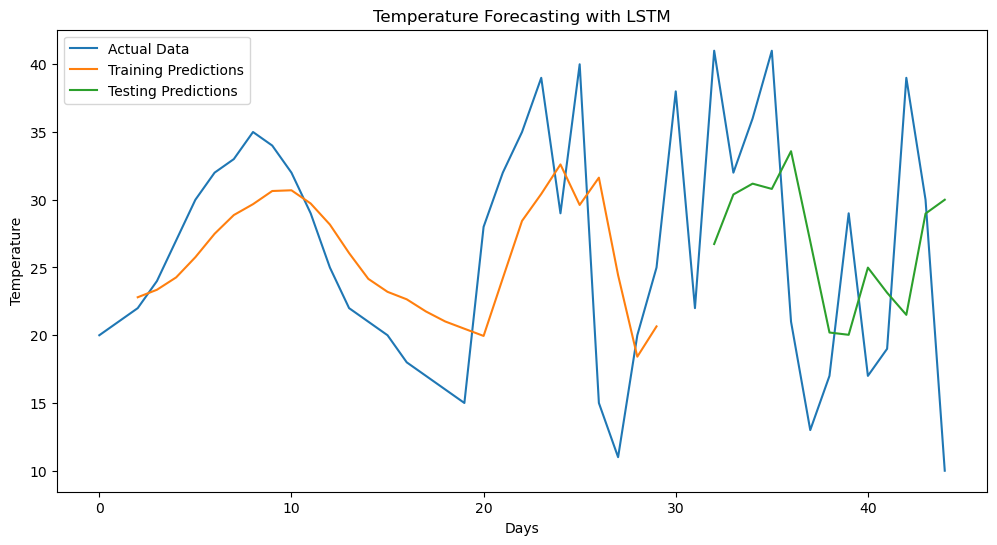

In [17]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label='Actual Data')
plt.plot(range(seq_length, train_size), train_predict, label='Training Predictions')
plt.plot(range(train_size + seq_length, len(temperature_data)), test_predict, label='Testing Predictions')
plt.legend()
plt.title('Temperature Forecasting with LSTM')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.show()